# Feature Standardization  
![yt ss](assets/Standardization.png)


### Std (standard deviation)
**Standard deviation tells you how spread out the data is from the average (mean).**  

Intuition behind the formula (not the math)
* Find the mean of all values.
* For each value, find how far it is from the mean (the deviation).
* Square those differences (to make them positive).
* Average those squares (that’s variance).
* Take the square root of that average — that’s standard deviation.

So,

Standard Deviation = **sqrt(Average of (𝑥𝑖−𝑥ˉ)^2)** where **_xi_** is each indivicual data point and **𝑥ˉ** is mean.

now this std is used in feature standardization in denominator shown in the picture

at the end, mean comes down to 0 and std to 1. in any case this goal is achieved.

Aslo a thing to remember, scaling doesn't affect outliers they remain the same even after scaling if not handled explicitly


## Let's code

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('assets/Social_Network_Ads.csv')
df.head()
df.shape

(400, 3)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop("Purchased",axis=1),
                                                 df['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

StandardScaler Class return numpy arrays rather DataFrames.. so gotta change them back.

In [56]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [57]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804


#### Comparison (Before & After Scaling)

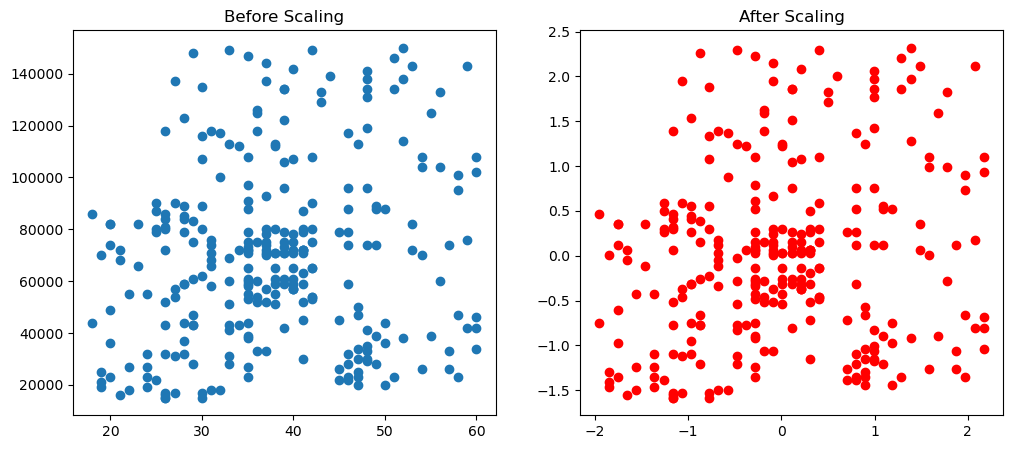

In [58]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x=X_train['Age'],y=X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

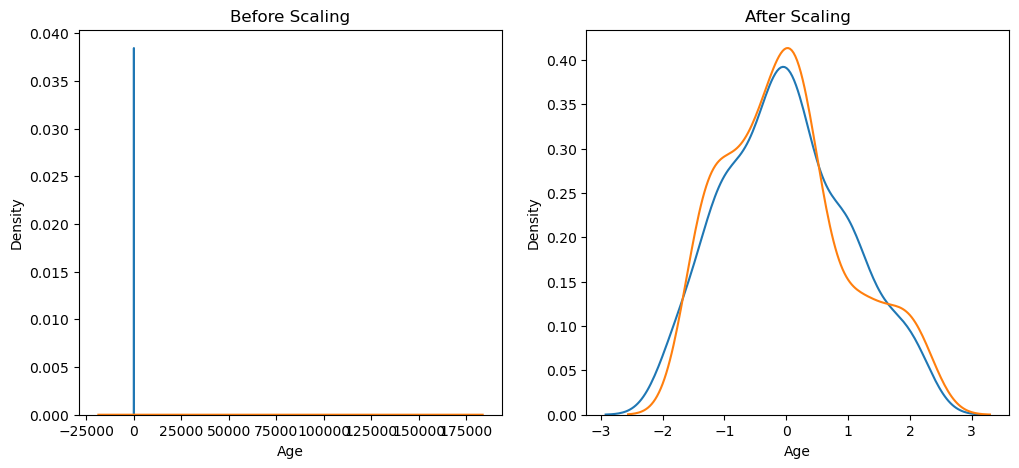

In [59]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax= ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax= ax1)
ax2.set_title("After Scaling")
sns.kdeplot(x=X_train_scaled['Age'], ax= ax2)
sns.kdeplot(x=X_train_scaled['EstimatedSalary'], ax= ax2)
plt.show()

### Why Scaling is important

In [60]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr= LogisticRegression()
lr_scaled = LogisticRegression()

In [82]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [83]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [86]:
accuracy_score(y_test,y_pred_scaled)*100

86.66666666666667

In [80]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


so back then (4 years ago when this yt video was recorded) LogisticRegression was sensetive to non-scaled data now it still is but not that much, that;s the reason there is not that much of a difference in accuracy with scaled and non-scaled data